## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

Fuel Economy Data
This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory.

Data Source
https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

Data Download
https://www.fueleconomy.gov/feg/download.shtml

Documentation 
https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf

### Additional Note:
>This analysis is part of Udacity's Data Analysis Nano Degree case study, organized and modified by Lu Tang

Attribute	Description
>- Model--	Vehicle make and model
>- Displ--	Engine displacement - the size of an engine in liters
>- Cyl--	The number of cylinders in a particular engine
>- Trans--	Transmission Type and Number of Gears
>- Drive--	Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
>- Fuel--	Fuel Type
>- Cert Region*--	Certification Region Code
>- Sales Area**--	Certification Region Code
>- Stnd--	Vehicle emissions standard code (View Vehicle Emissions Standards here)
>- Stnd Description*--	Vehicle emissions standard description
>- Underhood ID--	This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family." This is explained more here
>- Veh Class--	EPA Vehicle Class
>- Air Pollution Score--	Air pollution score (smog rating, scoring ranges from 1 (worst) to 10 (best)).
>- City MPG	Estimated-- city mpg (miles/gallon)
>- Hwy MPG	Estimated-- highway mpg (miles/gallon)
>- Cmb MPG	Estimated-- combined mpg (miles/gallon)
>- Greenhouse Gas Score--	Greenhouse gas rating (Vehicles that score a 10 are the cleanest)
>- SmartWay--	Yes, No, or Elite
>- Comb CO2*--	Combined city/highway CO2 tailpipe emissions in grams per mile

>- *Not included in 2008 dataset
>- ** Not included in 2018 dataset


### Relevant questions we could ask about this data:

Are more models using alternative sources of fuel? By how much?

How much have vehicle classes improved in fuel economy?

What are the characteristics of SmartWay vehicles?

What features are associated with better fuel economy?

For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

<a id='wrangling'></a>
# Data Wrangling

## Step1. Assessing Data

In [3]:
# Load data for 2008
import pandas as pd
df_08=pd.read_csv('all_alpha_08.csv')
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [4]:
# Load data for 2018
df_18=pd.read_csv('all_alpha_18.csv')
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [5]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [6]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.6+ KB


In [7]:
sum(df_08.duplicated()), sum(df_18.duplicated())

(25, 0)

### Analysis
> Columns and datatypes in two datasets are not consistent, and there are missing data and duplicated data too

## Step 2. Cleaning Columns, filter, drop nulls and dedupe.

### Step 2_1. Drop extraneous columns
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

In [8]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [9]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [10]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1, inplace=True)

# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1, inplace=True)

###  Step 2_2. Rename columns

In [11]:
# rename Sales Area to Cert Region
df_08.rename({'Sales Area':'Cert Region'}, axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [12]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x:x.strip().lower().replace(' ','_'), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [13]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x:x.strip().lower().replace(' ','_'), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [14]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns==df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [15]:
# make sure they're all identical like this
(df_08.columns==df_18.columns).all()

True

In [16]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

### Step 2_3. Filter by Certification Region

For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (all value are 'CA').

In [17]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v1.csv')
df_18 = pd.read_csv('data_18_v1.csv')

In [18]:
# view dimensions of the two datasets
df_08.shape, df_18.shape

((2404, 14), (1611, 14))

In [19]:
# Check the unique value in cert_region for 2008 data
df_08['cert_region'].value_counts()

FA    1157
CA    1084
FC     163
Name: cert_region, dtype: int64

In [20]:
# Check the unique value in cert_region for 2018 data
df_18['cert_region'].value_counts()

FA    813
CA    798
Name: cert_region, dtype: int64

In [21]:
# filter datasets for rows following California standards
df_08 = df_08[df_08['cert_region']=='CA']
# using query method (same as above)
df_18 = df_18.query('cert_region == "CA"')

In [22]:
# confirm only certification region is California
df_08['cert_region'].value_counts()

CA    1084
Name: cert_region, dtype: int64

In [23]:
# confirm only certification region is California
df_18['cert_region'].value_counts()

CA    798
Name: cert_region, dtype: int64

In [24]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [25]:
# Check the columns and row number after the change 
df_08.shape, df_18.shape

((1084, 13), (798, 13))

### Step 2_4. Drop Rows with Missing Values

In [26]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [27]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [28]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [29]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [30]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

### Step 2_5. Dedupe Data

In [31]:
# print number of duplicates in 2008 and 2018 datasets
sum(df_08.duplicated()), sum(df_18.duplicated())

(23, 3)

In [32]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [33]:
# print number of duplicates again to confirm dedupe - should both be 0
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

In [34]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

##  Step 3. Fix Datatypes

In [35]:
# Load data
df_08=pd.read_csv('data_08_v2.csv')
df_18=pd.read_csv('data_18_v2.csv')

In [36]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
model                   986 non-null object
displ                   986 non-null float64
cyl                     986 non-null object
trans                   986 non-null object
drive                   986 non-null object
fuel                    986 non-null object
veh_class               986 non-null object
air_pollution_score     986 non-null object
city_mpg                986 non-null object
hwy_mpg                 986 non-null object
cmb_mpg                 986 non-null object
greenhouse_gas_score    986 non-null object
smartway                986 non-null object
dtypes: float64(1), object(12)
memory usage: 100.2+ KB


In [37]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
model                   794 non-null object
displ                   794 non-null float64
cyl                     794 non-null float64
trans                   794 non-null object
drive                   794 non-null object
fuel                    794 non-null object
veh_class               794 non-null object
air_pollution_score     794 non-null int64
city_mpg                794 non-null object
hwy_mpg                 794 non-null object
cmb_mpg                 794 non-null object
greenhouse_gas_score    794 non-null int64
smartway                794 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 80.7+ KB


### Step 3_1. Fix `cyl`  datatypes

In [38]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [39]:
# Extract int from strings in the 2008 cyl column (the long way without regular expressions)
df_08['cyl']=(df_08['cyl']
              .str.split(' ',n=1, expand=True)
              .iloc[:,0]
              .str[1:]
              .astype(int)
             )

# Alternative way
# df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

[This](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas) explains how to extract ints from strings in Pandas.

In [40]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [41]:
# Convert floats to ints in the 2018 cyl column.
df_18['cyl']=df_18['cyl'].astype(int)

### 2. Fix ` air_pollution_score` datatypes

In [42]:
df_08['air_pollution_score'].sample(10)

505      6
214      6
570      7
457      7
709    9.5
743      6
735      7
867    9.5
518      7
211      7
Name: air_pollution_score, dtype: object

### try using Pandas to_numeric or astype function to convert the 2008 air_pollution_score column to float -- this won't work

In [43]:
# df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

### Figuring out the issue

> According to the error for above code, the air pollution score value in one of the rows is "6/4" 

In [44]:
# Find out the row(s) that contain '6/4'
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


**It's not just the air pollution score!**

The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
So all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [45]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [46]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


### Analysis
> Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). 

In [47]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use Pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [48]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [49]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [50]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [51]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [52]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [53]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [54]:
df_08.shape

(987, 13)

**Repeat this process for the 2018 dataset***

In [55]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

**Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`**

We don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [56]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

In [57]:
df1.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite


In [58]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index (the rows with '/')
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows)

In [59]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [60]:
df_18.shape

(832, 13)

In [61]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

In [62]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score']=df_18['air_pollution_score'].astype(float)

### Step3_3. Fix  `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes

In [63]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

### 6. Fix  `greenhouse_gas_score` datatypes

In [64]:
# Convert strings to ints in the 2008 column.
df_08['greenhouse_gas_score']=df_08['greenhouse_gas_score'].astype(int)

In [65]:
(df_08.dtypes == df_18.dtypes).all()

True

In [66]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Load data
df_08=pd.read_csv('clean_08.csv')
df_18=pd.read_csv('clean_18.csv')

In [69]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


### Q1: Compare the distributions of greenhouse gas score in 2008 and 2018.

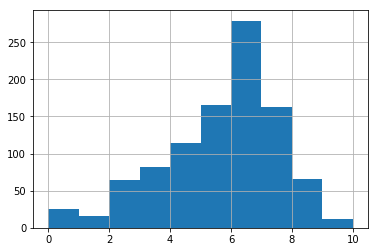

In [70]:
df_08['greenhouse_gas_score'].hist()

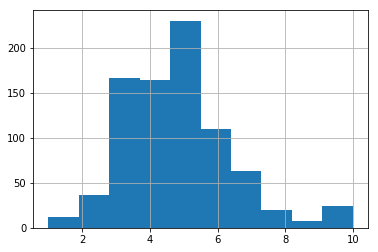

In [71]:
df_18['greenhouse_gas_score'].hist()

### Distribution for 2008 is more skewed to the left.
> Green gas score is getting lower in 2018

### Q2: How has the distribution of combined mpg changed from 2008 to 2018?

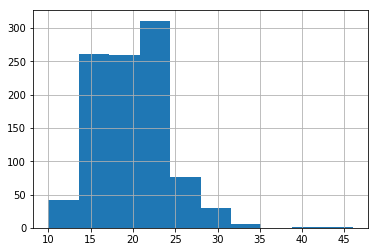

In [72]:
df_08['cmb_mpg'].hist()

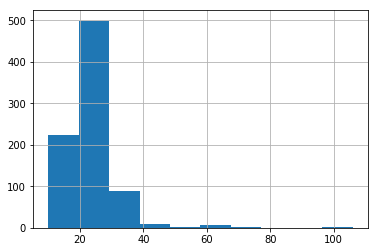

In [73]:
df_18['cmb_mpg'].hist()

### Become more skewed to the right
> cmb_mpg is becoming less in 2018

### Q3: Describe the correlation between displacement and combined mpg

In [74]:
df_08[['displ','cmb_mpg']].corr()

,displ,cmb_mpg
displ,1.000000,-0.818799
cmb_mpg,-0.818799,1.000000


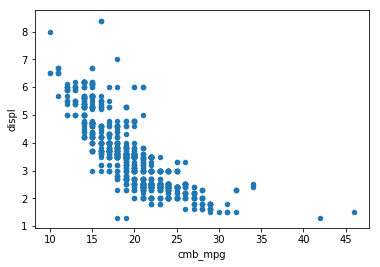

In [75]:
df_08.plot(x='cmb_mpg', y='displ', kind='scatter')

In [76]:
df_18[['displ','cmb_mpg']].corr()

,displ,cmb_mpg
displ,1.00000,-0.57488
cmb_mpg,-0.57488,1.00000


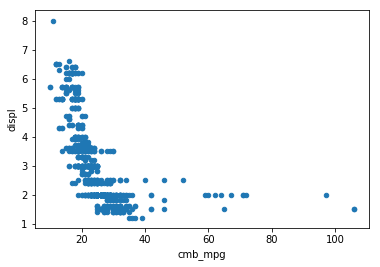

In [77]:
df_18.plot(x='cmb_mpg', y='displ', kind='scatter')

### Negitive correlation
> The bigger the size of the engine, the less cmb_mpg (miles per gallon) 

### Q4: Describe the correlation between greenhouse gas score and combined mpg.

In [78]:
df_08[['greenhouse_gas_score','cmb_mpg']].corr()

,greenhouse_gas_score,cmb_mpg
greenhouse_gas_score,1.000000,0.947607
cmb_mpg,0.947607,1.000000


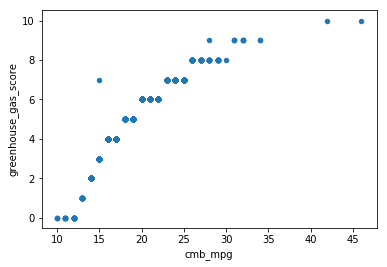

In [79]:
df_08.plot(x='cmb_mpg', y='greenhouse_gas_score', kind='scatter')

In [80]:
df_18[['greenhouse_gas_score','cmb_mpg']].corr()

,greenhouse_gas_score,cmb_mpg
greenhouse_gas_score,1.000000,0.814982
cmb_mpg,0.814982,1.000000


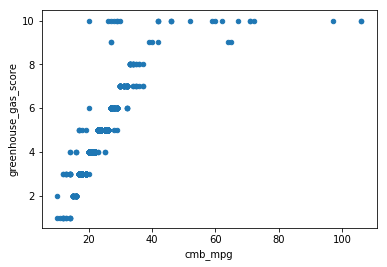

In [81]:
df_18.plot(x='cmb_mpg', y='greenhouse_gas_score', kind='scatter')

### Positive correlation 
> The higher the green score, the higher the cmb_mpg 

### Q5: Are more unique models using alternative sources of fuel? By how much?

First look at what the sources of fuel are and which ones are alternative sources.

In [82]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
gas           1
CNG           1
Name: fuel, dtype: int64

In [83]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 

In [84]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [85]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [86]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [87]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

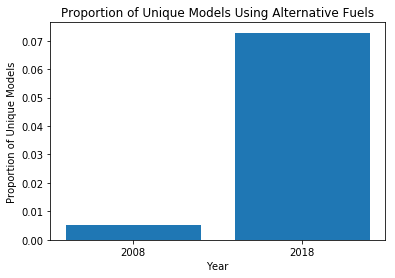

In [88]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

In [89]:
df_alt_08=df_08.query('fuel in ["CNG", "ethanol"]')
df_alt_08.mean()

displ                    2.40
cyl                      5.00
air_pollution_score      7.75
city_mpg                18.50
hwy_mpg                 27.50
cmb_mpg                 21.50
greenhouse_gas_score     8.00
dtype: float64

Text(0, 0.5, 'Proportion of Unique Models')

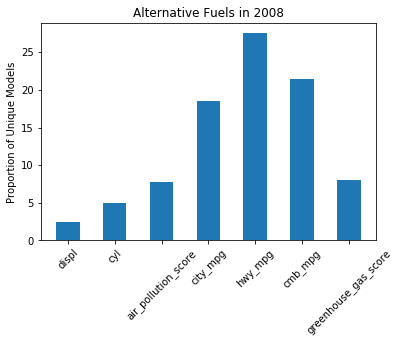

In [102]:
plt.bar(x=df_alt_08.mean().index, height=df_alt_08.mean(),width=0.5)

plt.title("Alternative Fuels in 2008")

plt.xticks(rotation =45)

plt.ylabel("Proportion of Unique Models")

In [90]:
df_alt_18=df_18.query('fuel in ["Ethanol", "Electricity"]')
df_alt_18.mean()

displ                    3.536842
cyl                      5.763158
air_pollution_score      4.157895
city_mpg                32.447368
hwy_mpg                 35.736842
cmb_mpg                 33.631579
greenhouse_gas_score     5.552632
dtype: float64

Text(0, 0.5, 'Proportion of Unique Models')

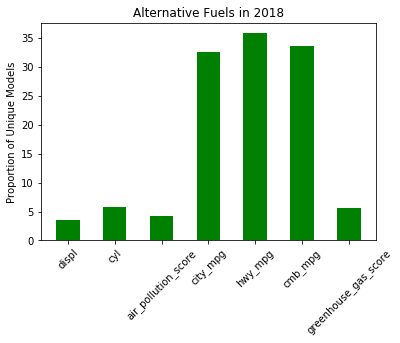

In [103]:
plt.bar(x=df_alt_18.mean().index, height=df_alt_18.mean(),width=0.5,color='g')

plt.title("Alternative Fuels in 2018")

plt.xticks(rotation =45)

plt.ylabel("Proportion of Unique Models")

### Q6: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [104]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [105]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [106]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

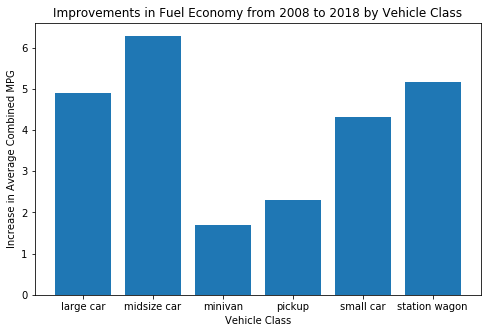

In [108]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q7: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [109]:
# smartway labels for 2008
df_08.smartway.value_counts()

no     607
yes    380
Name: smartway, dtype: int64

In [110]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [111]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [112]:
# smartway labels for 2018
df_18.smartway.value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

In [113]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [114]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q8: What features are associated with better fuel economy?

select all vehicles that have the top 50% fuel economy ratings

In [115]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [116]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


**Pandas documentation for merging and rename**

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

### Q9: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

#### 1. Create combined dataset

In [117]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

# view to check names
df_08.head(1)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [118]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [119]:
df_combined.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008',
       'model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

#### 2. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [120]:
df = df_combined

In [121]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg.head(3)

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.5
AUDI A3,23.333333,28.0
AUDI A4,21.000000,27.0


#### 3. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [122]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head(3)

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.5,3.500000
AUDI A3,23.333333,28.0,4.666667
AUDI A4,21.000000,27.0,6.000000


#### 4. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [123]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [124]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


Pandas also has a useful [`idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) function you can use to find the index of the row containing a column's maximum value!

In [125]:
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [126]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64